In [1]:
import os
import sys
sys.path.append(os.path.abspath("../../src/"))
from reader import *
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from tools import PDFs
import matplotlib.pyplot as plt
import lhapdf
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullFormatter)
#plt.rc('text', usetex=True)
#plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [3]:
#baseCJ = DataSets("fit_CJ.yaml")
baseCTEQ = DataSets("fit_CTEQ.yaml")
baseCJA2 = DataSets("fit_BaseCJA2.yaml")
basedeutCJA2 = DataSets("fit_BaseDeuCJA2.yaml")
basedeucjdijet = DataSets("fit_BaseDeuDijetA2.yaml")

Chi2 total :  2679.3027609933483
Chi2 w/o penalty :  2645.8782824119735
Chi2 total :  2518.4568037702684
Chi2 w/o penalty :  2479.8916088646233
Chi2 total :  3105.6778926772663
Chi2 w/o penalty :  3064.623440371763
Chi2 total :  3270.966385332841
Chi2 w/o penalty :  3229.4028038297815


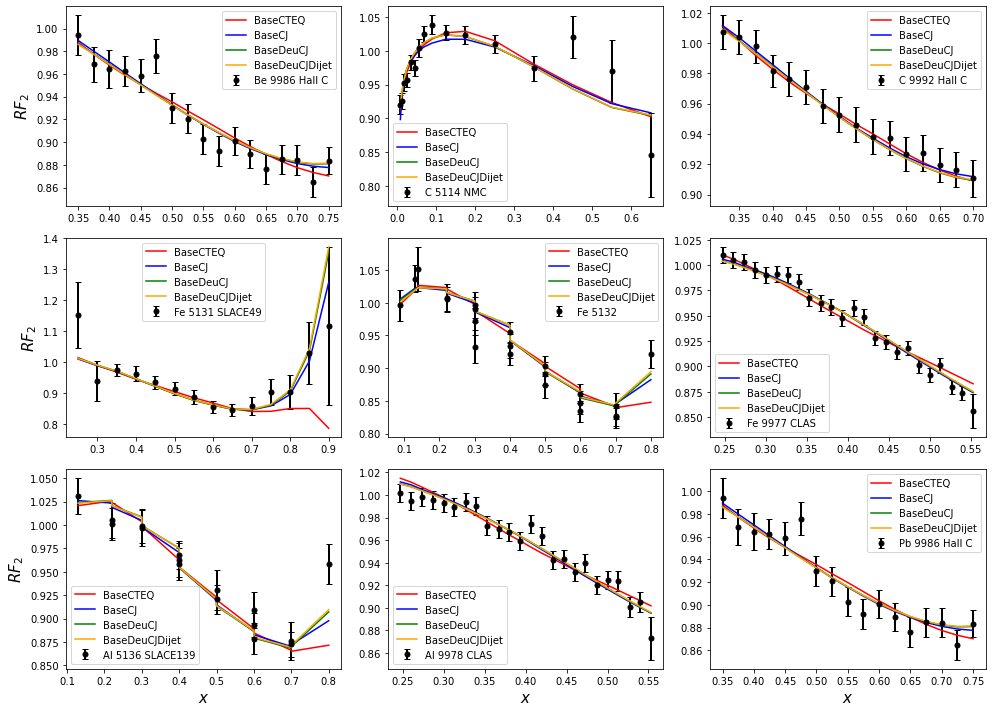

In [5]:
IDs = [[9986, 5131, 5132],
       [9977, 5136, 9978], 
       [5114, 9992, 9986]]
labels = [["Be 9986 Hall C", "Fe 5131 SLACE49", "Fe 5132 SLACE139"], 
          ["Fe 9977 CLAS", "Al 5136 SLACE139", "Al 9978 CLAS"], 
          ["C 5114 NMC", "C 9992 Hall C", "Pb 9986 Hall C"]]


IDs = [[9986, 5114, 9992],
       [5131, 5132, 9977], 
       [5136, 9978, 9986]]

labels = [["Be 9986 Hall C", "C 5114 NMC", "C 9992 Hall C"],
          ["Fe 5131 SLACE49", "Fe 5132" , "Fe 9977 CLAS"],
          ["Al 5136 SLACE139", "Al 9978 CLAS", "Pb 9986 Hall C"]]


theoryList = [baseCTEQ,  baseCJA2, basedeutCJA2, basedeucjdijet]
theoryLabels = ["BaseCTEQ", "BaseCJ", "BaseDeuCJ", "BaseDeuCJDijet"]
cl = ["red", "blue", "green", "orange"]
plt.figure(figsize=(14, 10))
for i in range(len (IDs) ) : 
    for j in range(len(IDs[0])) : 
        ax=plt.subplot2grid((len(IDs),len(IDs[0])),(int(i), j))   
        plt.tight_layout()
        id = IDs[i][j]
        df = baseCTEQ.datasets[id].table 
        x = df["X"] 
        data = df["Data"]
        Err = df["TotError"]
        plt.errorbar(x, data, Err, color='black', marker='o', linestyle='None', linewidth=2, markersize=5, capsize=3, label=labels[i][j])
        for k, th in enumerate(theoryList) :
            theory = th.datasets[id].table["Theory"]*th.datasets[id].norm
            plt.plot(x, theory, label=theoryLabels[k], color=cl[k])
        plt.legend()
        if (i==2) : 
            plt.xlabel("$x$", fontsize=15)
        if (j==0) :
            plt.ylabel("$RF_2$",  fontsize=15)

plt.savefig("DataTheo_nCTEQ22.pdf", bbox_inches="tight")


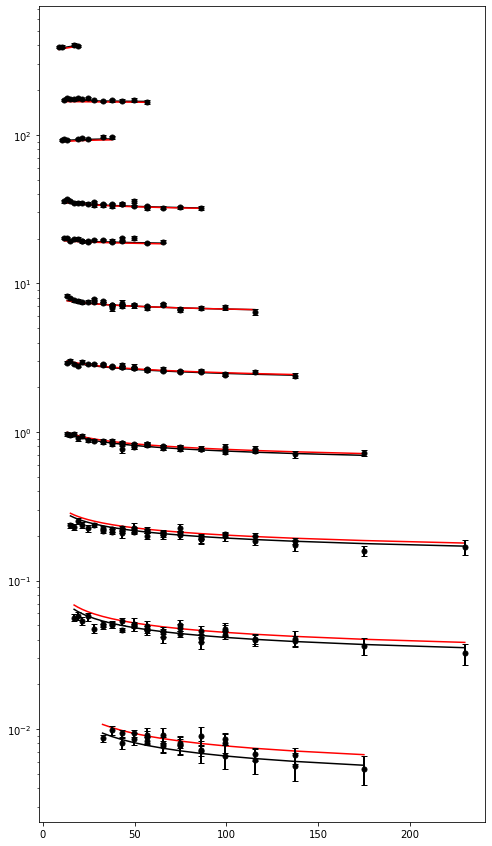

In [84]:
plt.figure(figsize=[8, 15])
tbl = basedeutCJA2.datasets[106].table
xbj = set(tbl["X"])

tbl2 = basecj_deudata.datasets[106].table



for i, x in enumerate(xbj) : 
    tblx = tbl[tbl["X"]==x].sort_values(by=['Q2'])
    tblx2 = tbl2[tbl2["X"]==x].sort_values(by=['Q2'])
    data =  tblx["Data"]
    denom = 1.0
    s =2**(len(xbj)-i-1)
    plt.plot(tblx["Q2"], s * tblx["Theory"]/denom, color="black", label ="DEUTFIT")
    plt.plot(tblx["Q2"], s * tblx2["Theory"]/denom, color="red", label ="PCJ")
    plt.errorbar(tblx["Q2"], s* data/denom, s*tblx["TotError"]/denom, color='black', marker='o', linestyle='None', linewidth=2, markersize=5, capsize=3)
plt.yscale("log")


In [47]:
tbl2 = basecj_deudata.datasets[106].table
tbl2[tbl2["X"]==0.75]

,X,Q2,Data,Theory,StatError,TotError,corr_1,corr_2,corr_3,corr_4,corr_5,Chi2
90,0.75,32.5,0.00868,0.010750,0.0005,0.0005,0.000347,0.000599,0.000816,0.0,0.0,5.963497
91,0.75,37.5,0.00986,0.010239,0.0007,0.0007,0.000325,0.000592,0.000828,0.0,0.0,-0.675087
92,0.75,43.0,0.00802,0.009789,0.0007,0.0007,0.000217,0.000417,0.000601,0.0,0.0,3.421272
93,0.75,49.5,0.00863,0.009363,0.0008,0.0008,0.000190,0.000397,0.000570,0.0,0.0,-0.003852
94,0.75,57.0,0.00879,0.008973,0.0009,0.0009,0.000149,0.000352,0.000483,0.0,0.0,-0.099659
95,0.75,65.5,0.00788,0.008622,0.0010,0.0010,0.000102,0.000276,0.000386,0.0,0.0,0.227317
96,0.75,75.0,0.00779,0.008303,0.0011,0.0011,0.000078,0.000241,0.000273,0.0,0.0,0.034603
97,0.75,86.0,0.00711,0.008001,0.0012,0.0012,0.000050,0.000192,0.000213,0.0,0.0,0.358489
98,0.75,99.0,0.00656,0.007712,0.0012,0.0012,0.000026,0.000157,0.000151,0.0,0.0,0.727871
169,0.75,43.0,0.00935,0.009789,0.0005,0.0005,0.000505,0.000813,0.001262,0.0,0.0,-2.269526


In [9]:
def getWeightedAverage (df, bin=[]) : 
    if (bin==[]) :
        xbj = set(df["X"])
        avel = []
        errl = []
        print(xbj)
        for x in xbj : 
            dt = df[df["X"]==x]
            theory = dt["Theory"]
            data = dt["Data"]/theory
            err = dt["TotError"]/theory
            weight = (1/np.sum(1/err**2))* (1/err**2) 

            #print("test : ", np.sum(weight))

            ave = np.sum (weight*data)
            aveerr = np.sqrt(np.sum( (weight**2) * (err**2) ) )
            avel.append(ave)
            errl.append(np.sqrt(len(data))*aveerr)  
            
    else : 
        xbj = []
        avel = []
        errl = []
        for el in bin : 
            xbj.append((el[0]+el[1])/2) 
            dt = df[  (df["X"]> el[0]) & (df["X"]<=el[1]) ]
            theory = dt["Theory"]
            data = dt["Data"]/theory
            err = dt["TotError"]/theory
            weight = (1/np.sum(1/err**2))* (1/err**2) 

            #print("test : ", np.sum(weight))

            ave = np.sum (weight*data)
            aveerr = np.sqrt(np.sum( (weight**2) * (err**2) ) )
            avel.append(ave)
            errl.append(np.sqrt(len(data))*aveerr)

    return [list(xbj), avel, errl]






In [7]:
basecj_deudata =  DataSets("fit_CJ_DEU.yaml")
#basedeutCJA2 = DataSets("fit_deutCJA2.yaml") 
basecteq_deudata = DataSets("fit_CTEQ_DEU.yaml")

Chi2 total :  3327.256744615218
Chi2 w/o penalty :  3295.820120383477
Chi2 total :  2646.3813033429983
Chi2 w/o penalty :  2646.3813033429983


{0.07, 0.14, 0.1, 0.225, 0.18, 0.275, 0.35, 0.45, 0.55, 0.65, 0.75}
{0.07, 0.14, 0.1, 0.225, 0.18, 0.275, 0.35, 0.45, 0.55, 0.65, 0.75}
{0.07, 0.14, 0.1, 0.225, 0.18, 0.275, 0.35, 0.45, 0.55, 0.65, 0.75}


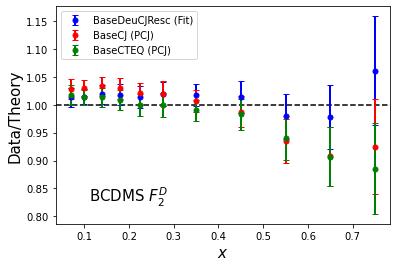

In [12]:
plt.figure(figsize=[6, 4])
tbl1 = basedeucjdijet_resc.datasets[106].table
tbl2 = basecj_deudata.datasets[106].table
tbl3 = basecteq_deudata.datasets[106].table
mydata1 = getWeightedAverage(tbl1)
mydata2 = getWeightedAverage(tbl2)
mydata3 = getWeightedAverage(tbl3)

plt.axhline(1.0, linestyle="dashed", color="black")
plt.errorbar(mydata1[0], mydata1[1], mydata1[2], color='blue', marker='o', linestyle='None', linewidth=2, markersize=5, capsize=3, label="BaseDeuCJResc (Fit)")
plt.errorbar(mydata2[0], mydata2[1], mydata2[2], color='red', marker='o', linestyle='None', linewidth=2, markersize=5, capsize=3, label="BaseCJ (PCJ)")
plt.errorbar(mydata3[0], mydata3[1], mydata3[2], color='green', marker='o', linestyle='None', linewidth=2, markersize=5, capsize=3, label="BaseCTEQ (PCJ)")

plt.legend()
plt.xlabel("$x$", fontsize=15)
plt.ylabel("Data/Theory", fontsize=15)
plt.annotate("BCDMS $F_2^D$", xy=[0.1, 0.1], xycoords='axes fraction', fontsize=15)
plt.savefig("deuweightedave.pdf", bbox_inches="tight")

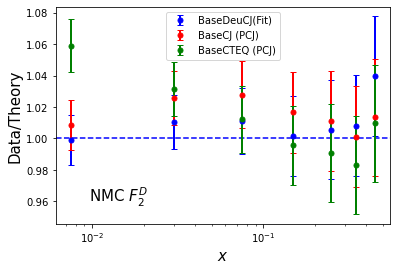

In [28]:
mybin = [[0.005, 0.01], [0.01, 0.05], [0.05, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
plt.figure(figsize=[6, 4])
tbl1 = basedeutCJA2.datasets[5160].table
tbl2 = basecj_deudata.datasets[5160].table
tbl3 = basecteq_deudata.datasets[5160].table
mydata1 = getWeightedAverage(tbl1, mybin)
mydata2 = getWeightedAverage(tbl2, mybin)
mydata3 = getWeightedAverage(tbl3, mybin)

plt.axhline(1.0, linestyle="dashed", color="blue")
plt.errorbar(mydata1[0], mydata1[1], mydata1[2], color='blue', marker='o', linestyle='None', linewidth=2, markersize=5, capsize=3, label="BaseDeuCJ(Fit)")
plt.errorbar(mydata2[0], mydata2[1], mydata2[2], color='red', marker='o', linestyle='None', linewidth=2, markersize=5, capsize=3, label="BaseCJ (PCJ)")
plt.errorbar(mydata3[0], mydata3[1], mydata3[2], color='green', marker='o', linestyle='None', linewidth=2, markersize=5, capsize=3, label="BaseCTEQ (PCJ)")

plt.legend(loc="upper center")

plt.xscale("log")
plt.xlabel("$x$", fontsize=15)
plt.ylabel("Data/Theory", fontsize=15)
plt.annotate("NMC $F_2^D$", xy=[0.1, 0.1], xycoords='axes fraction', fontsize=15)
plt.savefig("deuweightedave_nmc.pdf", bbox_inches="tight")

In [15]:
mydata = np.sort(mydata1[0])
print(mydata)

[0.005  0.0056 0.0073 0.0079 0.0081 0.009  0.0121 0.0122 0.0123 0.0124
 0.0126 0.0129 0.0138 0.0139 0.0168 0.0169 0.0172 0.0173 0.0174 0.0175
 0.0176 0.0178 0.018  0.0185 0.0235 0.0239 0.0241 0.0244 0.0245 0.0246
 0.0247 0.0248 0.0252 0.0253 0.0254 0.026  0.0276 0.0277 0.0279 0.0345
 0.0347 0.0348 0.0349 0.035  0.0354 0.0364 0.0368 0.0369 0.0374 0.0469
 0.0486 0.0487 0.049  0.0491 0.0493 0.0494 0.0495 0.0496 0.0501 0.0505
 0.0509 0.0516 0.0524 0.0526 0.0529 0.0663 0.0691 0.0694 0.0695 0.0696
 0.0697 0.0698 0.0699 0.07   0.0702 0.0703 0.0707 0.0711 0.0716 0.0718
 0.0863 0.0895 0.0896 0.0897 0.0899 0.09   0.0901 0.0903 0.0904 0.0905
 0.0906 0.0907 0.0909 0.0915 0.109  0.1094 0.1096 0.1097 0.1098 0.11
 0.1101 0.1102 0.1103 0.1105 0.1106 0.1108 0.111  0.1112 0.112  0.1125
 0.1282 0.1372 0.1383 0.1388 0.139  0.1393 0.1394 0.1395 0.1396 0.1398
 0.14   0.1405 0.1407 0.1409 0.1411 0.1417 0.1419 0.1421 0.1432 0.1737
 0.1769 0.1785 0.179  0.1791 0.1795 0.1798 0.1799 0.1801 0.1802 0.1803
 0.1804 